Иерархия исключений

В Python присутствует строгая иерархия исключений, вершиной которой является тип BaseException.

Тип BaseException является классом самого верхнего уровня и базовым для всех прочих классов исключений.

Дерево встроенных исключений выглядит так:

BaseException
 +-- SystemExit
 +-- KeyboardInterrupt
 +-- GeneratorExit
 +-- Exception
      +-- StopIteration
      +-- StopAsyncIteration
      +-- ArithmeticError
      |    +-- FloatingPointError
      |    +-- OverflowError
      |    +-- ZeroDivisionError
      +-- AssertionError
      +-- AttributeError
      +-- BufferError
      +-- EOFError
      +-- ImportError
           +-- ModuleNotFoundError
      +-- LookupError
      |    +-- IndexError
      |    +-- KeyError
      +-- MemoryError
      +-- NameError
      |    +-- UnboundLocalError
      +-- OSError
      |    +-- BlockingIOError
      |    +-- ChildProcessError
      |    +-- ConnectionError
      |    |    +-- BrokenPipeError
      |    |    +-- ConnectionAbortedError
      |    |    +-- ConnectionRefusedError
      |    |    +-- ConnectionResetError
      |    +-- FileExistsError
      |    +-- FileNotFoundError
      |    +-- InterruptedError
      |    +-- IsADirectoryError
      |    +-- NotADirectoryError
      |    +-- PermissionError
      |    +-- ProcessLookupError
      |    +-- TimeoutError
      +-- ReferenceError
      +-- RuntimeError
      |    +-- NotImplementedError
      |    +-- RecursionError
      +-- SyntaxError
      |    +-- IndentationError
      |         +-- TabError
      +-- SystemError
      +-- TypeError
      +-- ValueError
      |    +-- UnicodeError
      |         +-- UnicodeDecodeError
      |         +-- UnicodeEncodeError
      |         +-- UnicodeTranslateError
      +-- Warning
           +-- DeprecationWarning
           +-- PendingDeprecationWarning
           +-- RuntimeWarning
           +-- SyntaxWarning
           +-- UserWarning
           +-- FutureWarning
           +-- ImportWarning
           +-- UnicodeWarning
           +-- BytesWarning
           +-- ResourceWarning

Тип Exception – базовый класс для большинства встроенных в Python исключений. Именно его, а не BaseException, необходимо наследовать при создании пользовательского класса исключения.

Для проверки родства классов исключений можно использовать встроенную функцию issubclass(), которая указывает на то, является ли некоторый класс потомком указанного класса или нет.

In [1]:
print(issubclass(IndexError, LookupError))
print(issubclass(KeyError, Exception))
print(issubclass(ZeroDivisionError, ArithmeticError))

print(issubclass(IndexError, ArithmeticError))
print(issubclass(FloatingPointError, OverflowError))

True
True
True
False
False


Важно помнить, что если у нас используется несколько блоков except, то первыми нужно указывать наиболее конкретные. Иначе мы можем оказаться в ситуации вроде этой:

In [2]:
try:
    nums = [10, 5, 20, 25]
    print(nums[100])
except Exception:
    print('Произошла ошибка!')
except (KeyError, IndexError):
    print('Ошибка связанная с индексом!')

Произошла ошибка!


Здесь первый блок except отлавливает вообще все исключения, ведь любое конкретное исключение наследуется от типа Exception. Второй блок except не имеет шанса хоть раз быть выполненным.

Обработчик исключений может поймать не только указанные типы исключений, но и всех их потомков.

Работа с объектом возбужденного исключения

Если нужен доступ к сгенерированному исключению как к объекту, то используется специальный синтаксис.

In [3]:
try:
    nums = [10, 5, 20, 25]
    print(nums[100])
except (KeyError, IndexError) as err:  # записываем сгенерированное исключение в переменную err
    print(err)
    print(type(err))

list index out of range
<class 'IndexError'>


В данном примере в переменную err попадает объект типа IndexError.

Посмотреть все атрибуты объекта сгенерированного исключения можно с помощью встроенной функции dir().

In [4]:
try:
    print(1 / 0)
except ZeroDivisionError as err:
    print(dir(err))

['__cause__', '__class__', '__context__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__suppress_context__', '__traceback__', 'add_note', 'args', 'with_traceback']


Наибольший интерес представляет из себя атрибут args, о котором будет рассказано ниже.

В имени err нет ничего особенного. Это просто имя, которое мы выбрали для примеров. Можно использовать любое имя по своему выбору. Обычно используют имена err, exp, e

Если при обработке всех исключений одним блоком except мы хотим получить доступ к объекту исключения, то нужно явно указать его тип.

In [5]:
try:
    х = 1 / 0
except as err:
    print(err)

SyntaxError: invalid syntax (1792582329.py, line 3)

In [6]:
try:
    х = 1 / 0
except Exception as err:
    print(err)

division by zero


Примечания

Примечание 1. Для получения информации об исключении можно воспользоваться функцией exc_infо() из модуля sys. Данная функция возвращает кортеж из трех значений: типа исключения, значения и объекта с трассировочной информацией об исключении, которое в данный момент обрабатывается.

In [7]:
from sys import exc_info

try:
    х = 1 / 0
except Exception as err:
    print(exc_info())

(<class 'ZeroDivisionError'>, ZeroDivisionError('division by zero'), <traceback object at 0x000001D5DEEFD080>)


Преобразовать эти значения в удобочитаемый вид позволяет модуль traceback

Примечание 2. Таблица основных типов исключений.

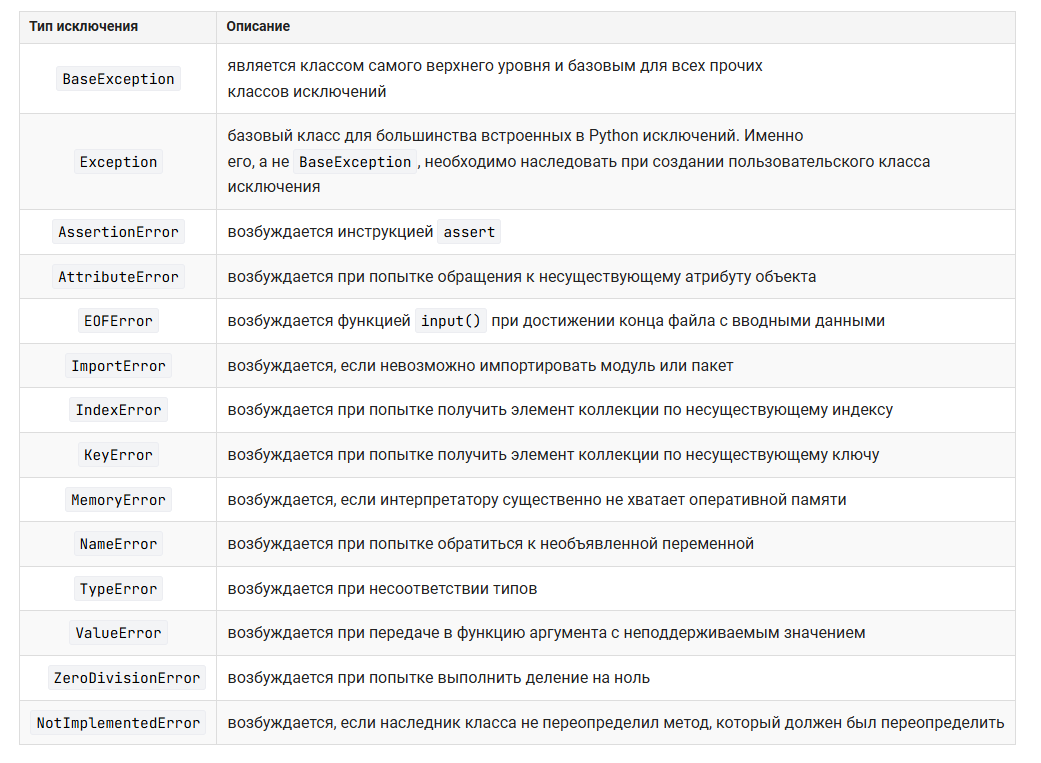

In [9]:
__import__('functions').picture('лдоаБез имени.png')

Примечание 3. Класс, от которого производится наследование, называется базовым, родительским или суперклассом. Новый класс называется потомком, наследником, дочерним или производным классом. Базовым классом для большинства встроенных в Python исключений является Exception.

Возбуждение исключений

До сих пор мы позволяли интерпретатору Python возбуждать исключения, совершая преднамеренно ошибки. Однако мы можем заставить и наш код также возбудить исключение.

Для возбуждения исключения используется оператор raise. В качестве аргумента оператор raise использует экземпляр класса, унаследованного от Exception. Класс указывает на тип исключения, а аргумент, передаваемый конструктору этого исключения, обычно описывает подробности возникновения исключительной ситуации.

Если возбуждаемые пользователем исключения не перехватываются, то они распространяются вплоть до стандартного обработчика исключений и прекращают работу программы с выводом стандартного сообщения об ошибке.

Возбуждаемые пользователем исключения перехватываются тем же способом, что и исключения, которые возбуждает интерпретатор Python.

In [13]:
try:
    raise IndexError('ошибочка')  # возбуждение исключения вручную
except Exception as err:
    print(err)
    print(type(err))

ошибочка
<class 'IndexError'>


In [16]:
def get_month_name(index):
    if not index.isdigit():
        raise TypeError('Аргумент должен быть числом.')
    if int(index) < 1 or int(index) > 12:
        raise ValueError('Аргумент должен быть целым числом от 1 до 12.')
    # ...

При создании объекта исключения мы можем указать в конструкторе подробности возникновения исключительной ситуации. Конструктор любого исключения принимает переменное количество аргументов. Для того чтобы получить указанные значения, мы используем атрибут args, который является кортежем.

In [17]:
try:
    x, y = 10, 0
    if y == 0:
        raise ZeroDivisionError('Произошло деление на ноль.')
except ZeroDivisionError as err:
    print(err)
    print(err.args)
    print(type(err.args))

Произошло деление на ноль.
('Произошло деление на ноль.',)
<class 'tuple'>


При печати объекта исключения автоматически происходит вызов функции str().

Оператор возбуждения исключений raise имеет несколько вариантов формата:

raise <экземпляр класса>
raise <название класса>
raise <экземпляр или название класса> from <объект исключения>
raise

В первом варианте оператора raise указывается экземпляр класса возбуждаемого исключения с аргументами при необходимости.

In [ ]:
raise ValueError('Oпиcaниe исключения')

Во втором варианте оператора raise указывается только название класса исключения.

In [ ]:
raise ValueError  # эквивалентно: raise ValueError()

В третьем варианте оператора raise сначала указывается экземпляр класса или просто название класса, а потом объект исключения, на основании которого создается новое исключение. В этом случае объект исходного исключения сохраняется в атрибуте __cause__. При обработке вложенных исключений эти данные используются для вывода информации не только о последнем исключении, но и о первоначальном исключении.

In [18]:
try:
    # Вызовим исключение
    raise ValueError("Произошла ошибка в процессе выполнения.")
except ValueError as e:
    try:
        # Вложенное исключение, где мы заново возбуждаем исключение
        raise TypeError("Ошибка типа данных.") from e
    except TypeError as e2:
        # Вложенное исключение с указанием первоначальной ошибки через __cause__
        print("Ошибка TypeError: ", e2)
        print("Первоначальная ошибка: ", e2.__cause__)

Ошибка TypeError:  Ошибка типа данных.
Первоначальная ошибка:  Произошла ошибка в процессе выполнения.


Повторное возбуждение исключения

В четвертом варианте оператора raise мы повторно возбуждаем и пробрасываем выше последнее перехваченное исключение.

In [20]:
def process_data(data):
    try:
        if data == "bad_data":
            raise ValueError("Некорректные данные")
        print(f"Обрабатываем данные: {data}")
    except ValueError as e:
        print(f"Произошла ошибка: {e}")
        # Повторно возбуждаем то же самое исключение
        raise


try:
    process_data("bad_data")
except ValueError as e:
    print(f"Исключение было проброшено снова: {e}")  # пробрасываем исключение выше

Произошла ошибка: Некорректные данные
Исключение было проброшено снова: Некорректные данные


Примечания

Примечание 1. Возбуждение исключения в коде похоже на return, только на его глобальную версию, завершающую все функции в порядке, обратном тому, в котором они вызывались. Если исключение будет возбуждено, но не будет перехвачено, то есть как-то обработано, вся программа так и завершится.

Примечание 2. Сам механизм исключений достаточно медленный, поэтому, например, не очень хорошей идеей будет возбуждать исключение внутри цикла, когда мы точно знаем, что их будет достаточно большое количество.

Примечание 3. В ситуации, когда мы перехватываем исключение, делаем некие действия, а затем пробрасываем его выше, нужно использовать следующий код:

In [22]:
try:
    х = 1 / 0
except Exception as err:
    print(err)  # каким-то образом обработали перехваченное исключение
    raise  # пробрасываем исключение выше

division by zero


ZeroDivisionError: division by zero

Использовать код не рекомендуется, так как мы получим возбуждение нового исключения, пусть даже и представляющего старый объект. Возбуждение нового исключения повлечет за собой потерю информации о месте возникновения изначального исключения.

In [21]:
try:
    х = 1 / 0
except Exception as err:
    print(err)
    raise err

division by zero


ZeroDivisionError: division by zero

Просто пишите raise — так будет заново возбуждено последнее перехваченное исключение с сохранением нужной информации.

Примечание 4. Как уже говорилось ранее, при создании объекта исключения мы можем указать в конструкторе подробности возникновения исключительной ситуации. Конструктор исключения принимает переменное количество аргументов.

In [23]:
try:
    raise ValueError('Произошла ошибка')
except ValueError as e:
    print(e)

Произошла ошибка


Примечательно то, что при передаче переменной с исключением в функцию print() происходит вывод именно тех аргументов, которые были указаны при создании объекта исключения. И если таких аргументов было передано несколько, они будут выведены все в виде кортежа.

In [24]:
try:
    raise ValueError('Ой', 'Произошла ошибка')
except ValueError as e:
    print(e)

('Ой', 'Произошла ошибка')


In [25]:
try:
    raise ValueError('oops')
except ValueError as e:
    print(e)
    print(e.args)
    print(type(e.args))

oops
('oops',)
<class 'tuple'>


In [27]:
data = {'Chrome': 'browser', 'Discord': 'messenger', 'Steam': 'digital distributor'}

try:
    try:
        app_name = 'Firefox'
        app_type = data[app_name]
    except:
        raise KeyError('Not found', app_name)
except KeyError as e:
    print(e.args)

('Not found', 'Firefox')


Функция get_weekday()
Реализуйте функцию get_weekday(), которая принимает один аргумент:

number — целое число (от 1 до 7 включительно)
Функция должна возвращать полное название дня недели на русском, который соответствует числу number, при этом:

если number не является целым числом, функция должна возбуждать исключение: 
TypeError('Аргумент не является целым числом')
если number является целым числом, но не принадлежит отрезку [1;7], функция должна возбуждать исключение: 
ValueError('Аргумент не принадлежит требуемому диапазону')
Примечание 1. В тестирующую систему сдайте программу, содержащую только необходимую функцию get_weekday(), но не код, вызывающий ее.

In [38]:
def get_weekday(number: int):
    if type(number) is int:
        try:
            week = {1: "Понедельник", 2: "Вторник", 3: "Среда", 4: "Четверг", 5: "Пятница", 6: "Суббота",
                    7: "Воскресенье", }
            return week[number]
        except:
            raise ValueError('Аргумент не принадлежит требуемому диапазону')
    else:
        raise TypeError('Аргумент не является целым числом')


print(get_weekday(1))

try:
    print(get_weekday('hello'))
except Exception as err:
    print(err)
    print(type(err))

try:
    print(get_weekday(8))
except ValueError as err:
    print(err)
    print(type(err))

try:
    print(get_weekday(4.0))
except Exception as err:
    print(err)
    print(type(err))

Понедельник
Аргумент не является целым числом
<class 'TypeError'>
Аргумент не принадлежит требуемому диапазону
<class 'ValueError'>
Аргумент не является целым числом
<class 'TypeError'>


In [41]:
import calendar, locale

locale.setlocale(locale.LC_ALL, 'ru_RU.UTF-8')
days = dict(enumerate(calendar.day_name, 1))
print(days)

{1: 'понедельник', 2: 'вторник', 3: 'среда', 4: 'четверг', 5: 'пятница', 6: 'суббота', 7: 'воскресенье'}


Функция get_id()
В онлайн-школе BEEGEEK имя ученика считается корректным, если оно начинается с заглавной латинской буквы, за которой следуют строчные латинские буквы. Например, имена Timur и Yo считаются корректными, а имена timyrik, Yo17, TimuRRR нет. Также у каждого ученика имеется идентификационный номер, представленный натуральным числом, который выдается при поступлении в школу. К примеру, если в школе обучается 10 учеников, то новый прибывший ученик получит идентификационный номер равный 11.

Реализуйте функцию get_id(), которая принимает два аргумента:

names — список имен учеников, обучающихся в школе
name — имя поступающего ученика
Функция должна возвращать идентификационный номер, который получит поступающий в школу ученик, при этом

если имя ученика name не является строкой (тип str), функция должна возбуждать исключение:
TypeError('Имя не является строкой')
если имя ученика name является строкой (тип str), но не представляет собой корректное имя, функция должна возбуждать исключение:
ValueError('Имя не является корректным')
Примечание 1. В тестирующую систему сдайте программу, содержащую только необходимую функцию get_id(), но не код, вызывающий ее. 

In [80]:
def get_id(names: list, name: str):
    try:
        if not name.isalpha() or not name[0].isupper() or not name[1:].islower():
            raise ValueError('Имя не является корректным')
        else:
            return len(names) + 1
    except AttributeError:
        raise TypeError('Имя не является строкой')

names = ['Timur', 'Anri', 'Dima']
name = 'Arthur'

print(get_id(names, name))

names = ['Timur', 'Anri', 'Dima', 'Arthur']
name = 'Ruslan1337'

try:
    print(get_id(names, name))
except ValueError as e:
    print(e)
    
names = ['Timur', 'Anri', 'Dima', 'Arthur', 'Ruslan']
name = ['E', 'd', 'u', 'a', 'r', 'd']

try:
    print(get_id(names, name))
except TypeError as e:
    print(e)
    
names = ['Timur', 'Anri', 'Dima', 'Arthur']
name = 'ruslan'

try:
    print(get_id(names, name))
except ValueError as e:
    print(e)
    
names = ['Timur', 'Anri', 'Dima', 'Arthur']
name = 'RuSlan'

try:
    print(get_id(names, name))
except ValueError as e:
    print(e)
    

4
Имя не является корректным
Имя не является строкой
Имя не является корректным
Имя не является корректным


In [ ]:
def get_id(names: list, name: str) -> int:
    id_ = len(names)
    if not isinstance(name, str):
        raise TypeError('Имя не является строкой')
    if not name.istitle() or not name.isalpha():
        raise ValueError('Имя не является корректным')
    return id_ + 1

Десериализация
Напишите программу, которая принимает на вход название JSON файла, десериализует содержащийся в этом файле объект и выводит его.

если файла с данным названием нет в папке с программой, программа должна вывести текст:
Файл не найден
если файл с данным названием содержит некорректные данные (то есть не удовлетворяющие формату JSON), программа должна вывести текст:
Ошибка при десериализации
Формат входных данных
На вход программе подается название JSON файла.

Формат выходных данных
Программа должна десериализовать объект, содержащийся в файле с введенным названием, и вывести его. Если при поиске файла или десериализации его содержимого произошла ошибка, программа должна вывести соответствующий текст.

Примечание 1. Название подаваемого файла уже содержит расширение.

Примечание 2. В первом тесте файл numbers.json имеет следующее содержание

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Файл countries.json, представленный во втором тесте, отсутствует в папке с программой.

В третьем тесте файл stores.json имеет следующее содержание:

[}{}D}A{Sd]as][d]as[d][A}SD[as]d[][1111111111111[{}0002

In [84]:
import json

name = input()

try:
    with open(name) as file:
        data = json.load(file)
        print(data)
except FileNotFoundError:
    print('Файл не найден')
except json.decoder.JSONDecodeError:
    print('Ошибка при десериализации')    

Файл не найден


In [ ]:
import json

try:
    with open(input(), encoding='utf-8') as f:
        print(json.load(f))
except FileNotFoundError:
    print('Файл не найден')
except ValueError:
    print('Ошибка при десериализации')